In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display as ipydisplay
from utils.country_config import country_colors, get_selected_countries

# Bereinigte Daten laden
df = pd.read_csv('../data/processed/wec_cleaned.csv')

# Auswahl relevanter Länder
selected_countries = get_selected_countries(df, value_col='PrimaryEnergy')
print(f"Anzahl ausgewählter Länder: {len(selected_countries)}")
print(selected_countries)

Anzahl ausgewählter Länder: 19
['Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Malaysia', 'Netherlands', 'Poland', 'Russia', 'Singapore', 'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom', 'United States', 'Vietnam']


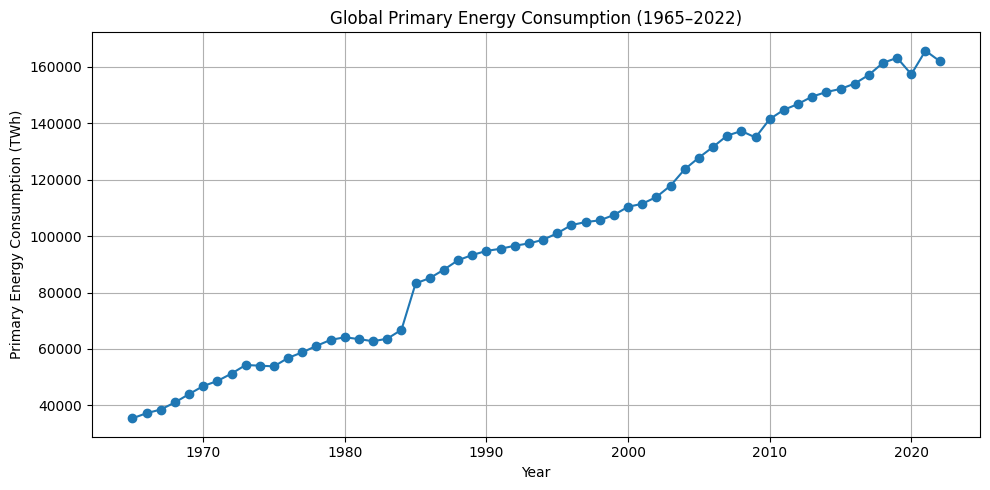

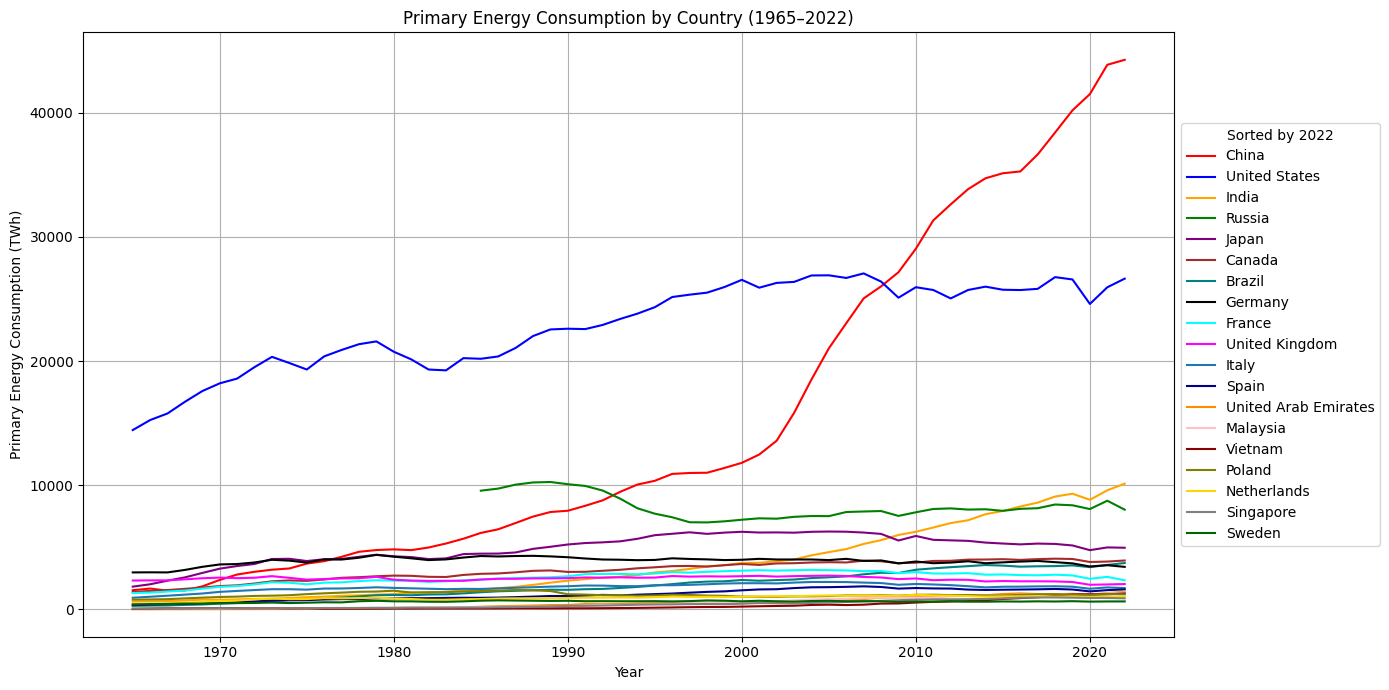

In [2]:
# Globaler Primärenergieverbrauch
df_global = df.groupby('Year')['PrimaryEnergy'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_global['Year'], df_global['PrimaryEnergy'], marker='o')
plt.title(f'Global Primary Energy Consumption (1965–{df_global["Year"].max()})')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption (TWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Energieverbrauch nach Land
df_selected = df[df['Country'].isin(selected_countries)]
energy_grouped = df_selected.groupby(['Year', 'Country'])['PrimaryEnergy'].sum().unstack()

last_year = energy_grouped.index.max()
sorted_countries = energy_grouped.loc[last_year].sort_values(ascending=False).index

plt.figure(figsize=(14, 7))
for country in sorted_countries:
    plt.plot(energy_grouped.index, energy_grouped[country], label=country, color=country_colors.get(country))

plt.title(f'Primary Energy Consumption by Country (1965–{last_year})')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption (TWh)')
plt.legend(title=f'Sorted by {last_year}', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

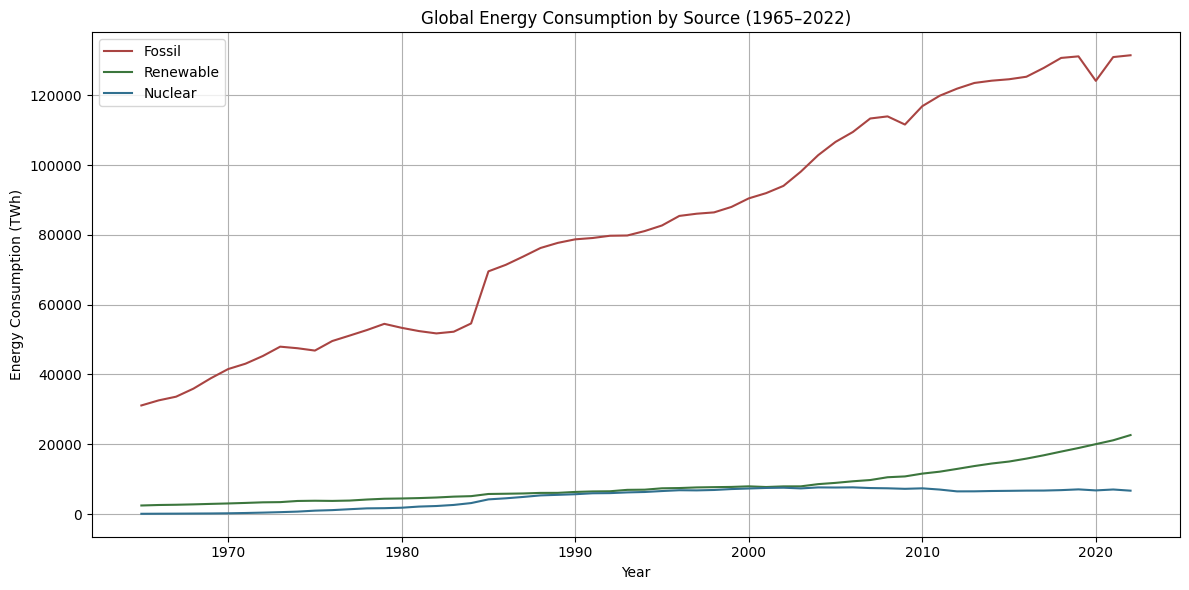

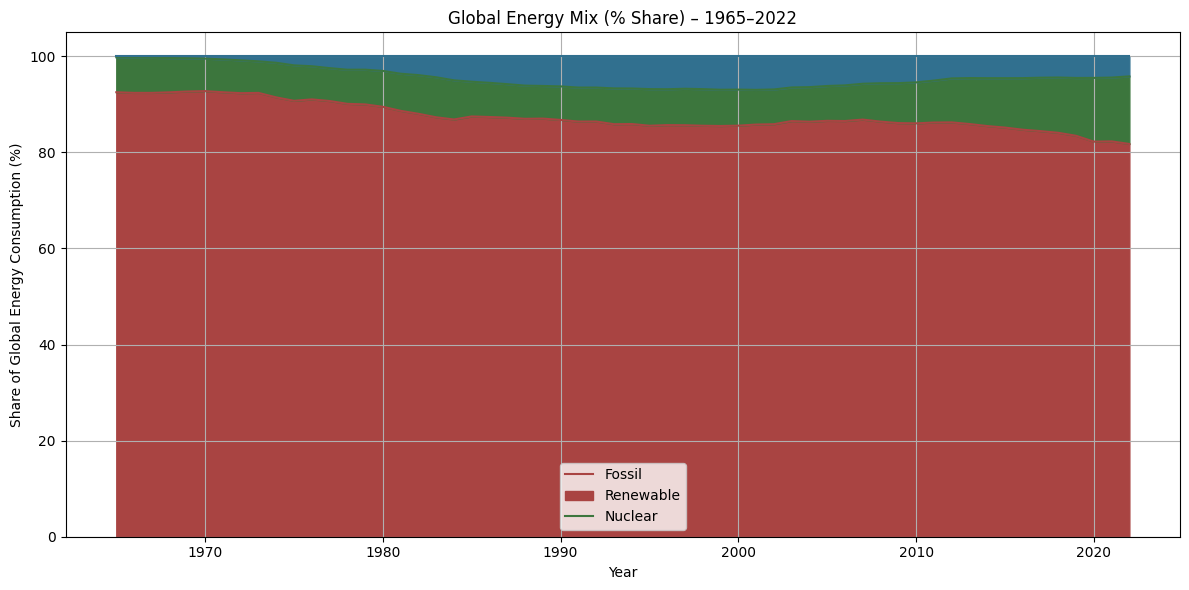

In [3]:
# Global: Entwicklung der Energiequellen
df_global_mix = df.groupby('Year')[['FossilEnergy', 'RenewablesEnergy', 'NuclearEnergy']].sum()
df_global_mix['Total'] = df_global_mix.sum(axis=1)

# Absolute Werte in TWh
plt.figure(figsize=(12, 6))
plt.plot(df_global_mix.index, df_global_mix['FossilEnergy'], label='Fossil', color='#a94442')
plt.plot(df_global_mix.index, df_global_mix['RenewablesEnergy'], label='Renewable', color='#3c763d')
plt.plot(df_global_mix.index, df_global_mix['NuclearEnergy'], label='Nuclear', color='#31708f')

plt.title(f'Global Energy Consumption by Source (1965–{df_global_mix.index.max()})')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Prozentuale Verteilung (Flächendiagramm)
df_area = df_global_mix[['FossilEnergy', 'RenewablesEnergy', 'NuclearEnergy']].div(df_global_mix['Total'], axis=0) * 100

df_area.plot.area(
    figsize=(12, 6),
    color=['#a94442', '#3c763d', '#31708f'],
    title=f'Global Energy Mix (% Share) – {df_area.index.min()}–{df_area.index.max()}'
)
plt.xlabel('Year')
plt.ylabel('Share of Global Energy Consumption (%)')
plt.legend(['Fossil', 'Renewable', 'Nuclear'])
plt.grid(True)
plt.tight_layout()
plt.show()

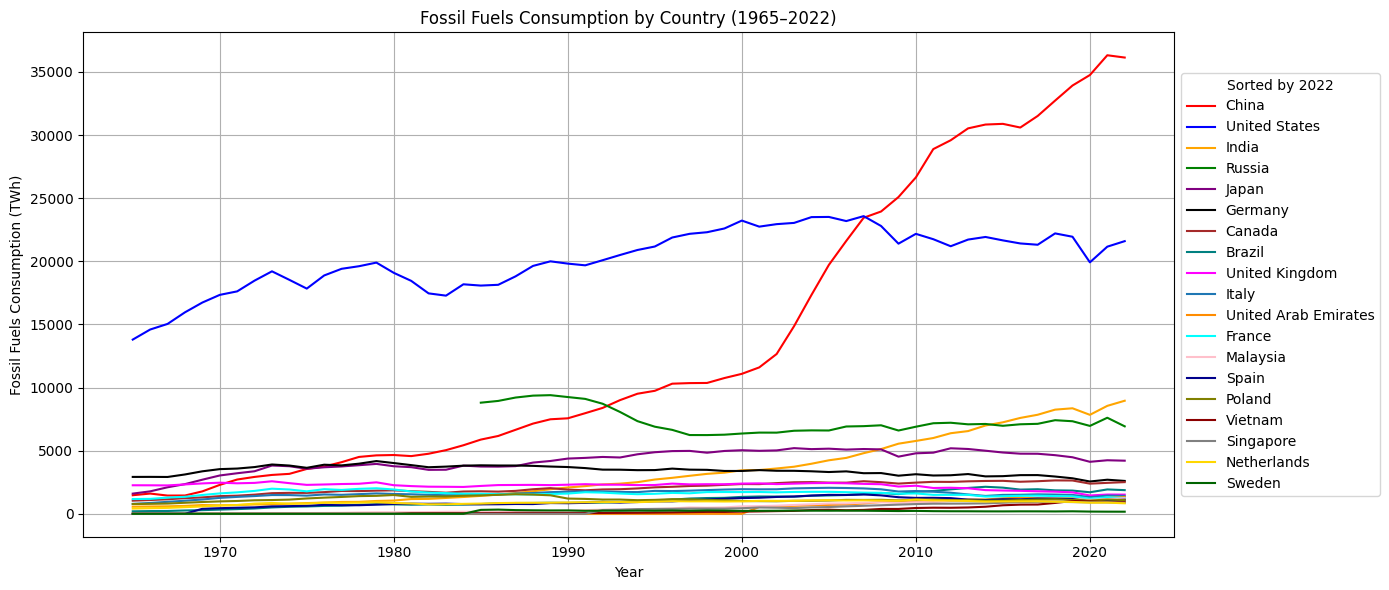

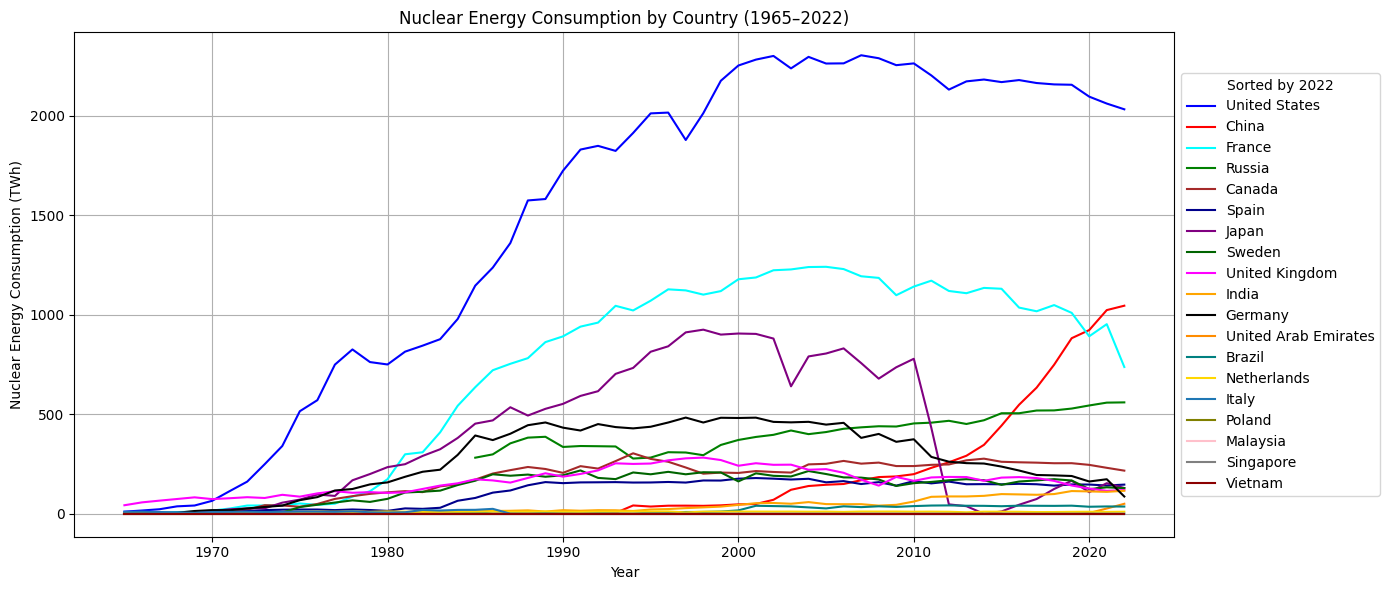

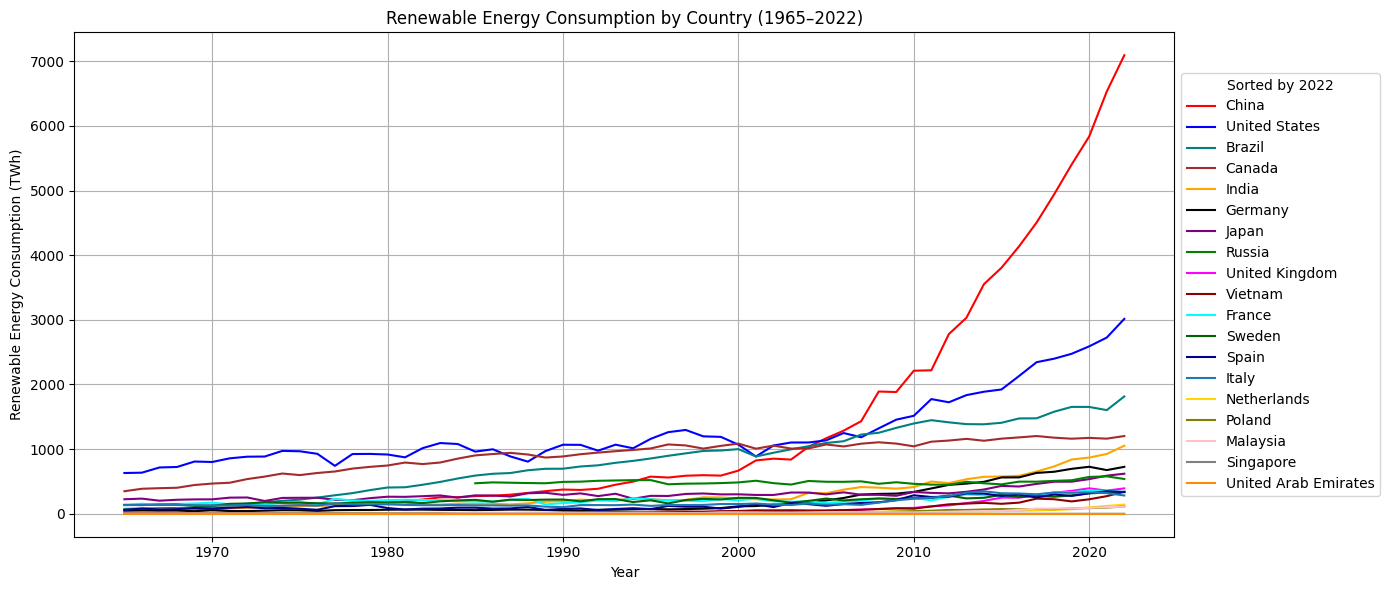

In [4]:
# Fossil vs. Nuclear vs. Renewables
fuel_cols = ['FossilEnergy', 'NuclearEnergy', 'RenewablesEnergy']
titles = ['Fossil Fuels', 'Nuclear Energy', 'Renewable Energy']

for col, title in zip(fuel_cols, titles):
    fuel_grouped = df_selected.groupby(['Year', 'Country'])[col].sum().unstack()
    last_year = fuel_grouped.index.max()
    sorted_countries = fuel_grouped.loc[last_year].sort_values(ascending=False).index

    plt.figure(figsize=(14, 6))
    for country in sorted_countries:
        color = country_colors.get(country)
        plt.plot(fuel_grouped.index, fuel_grouped[country], label=country, color=color)

    plt.title(f'{title} Consumption by Country (1965–{last_year})')
    plt.xlabel('Year')
    plt.ylabel(f'{title} Consumption (TWh)')
    plt.legend(title=f'Sorted by {last_year}', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

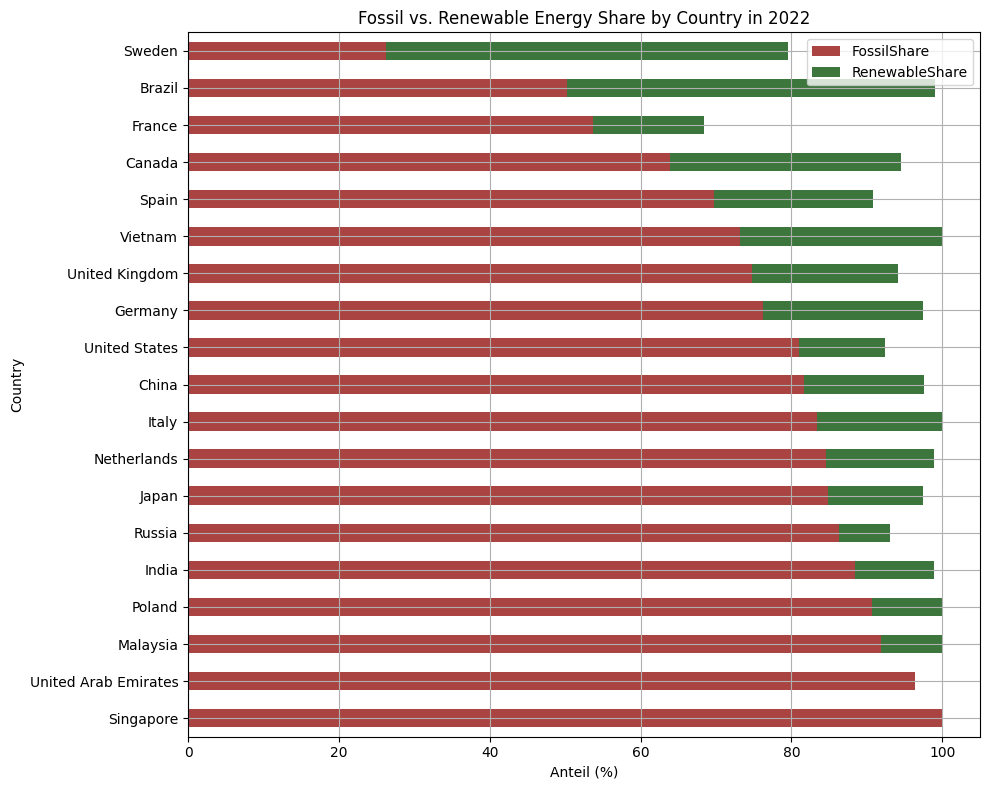

In [5]:
# Für das letzte Jahr
df_latest = df_selected[df_selected['Year'] == last_year].copy()

# Gesamtenergie und Anteile berechnen
df_latest['TotalEnergy'] = (
    df_latest['FossilEnergy'] +
    df_latest['NuclearEnergy'] +
    df_latest['RenewablesEnergy']
)
df_latest['FossilShare'] = df_latest['FossilEnergy'] / df_latest['TotalEnergy'] * 100
df_latest['RenewableShare'] = df_latest['RenewablesEnergy'] / df_latest['TotalEnergy'] * 100

# Balkendiagrammdaten vorbereiten
df_bar = df_latest.set_index('Country')[['FossilShare', 'RenewableShare']].loc[selected_countries]

# Nach Fossilanteil sortieren
df_bar_sorted = df_bar.sort_values(by='FossilShare', ascending=False)

# Plot
df_bar_sorted.plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
    color=['#a94442', '#3c763d']
)
plt.xlabel('Anteil (%)')
plt.title(f'Fossil vs. Renewable Energy Share by Country in {last_year}')
plt.tight_layout()
plt.grid(True)
plt.show()